In [27]:
import os
import random
import numpy as np
import pandas as pd
import seaborn as sns
from termcolor import colored
import matplotlib.pyplot as plt

import keras
import keras_cv
import tensorflow as tf

import io
from PIL import Image
import ipywidgets
from IPython.display import display,clear_output

print(colored('All libraries imported succesfully', 'green', attrs=['bold']))

All libraries imported succesfully


In [33]:
dir = './Data/'

In [34]:
classes = [class_name for class_name in os.listdir(dir) if class_name != '.DS_Store']
classes

['meningioma_tumor', 'glioma_tumor', 'pituitary_tumor', 'normal']

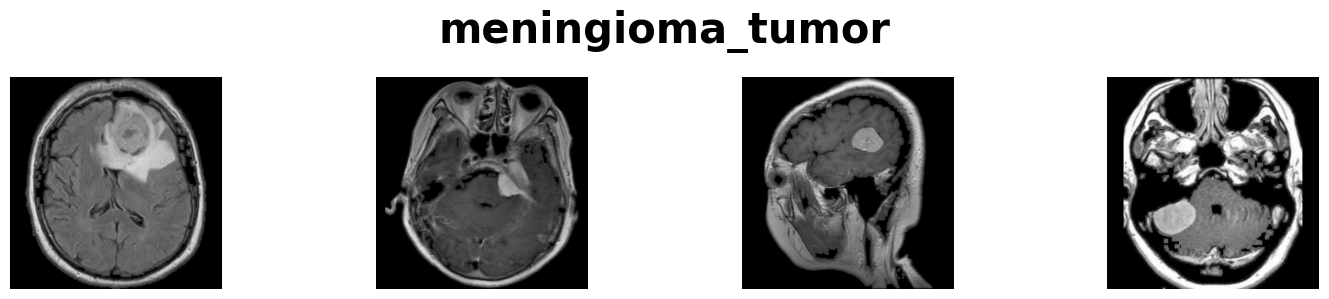

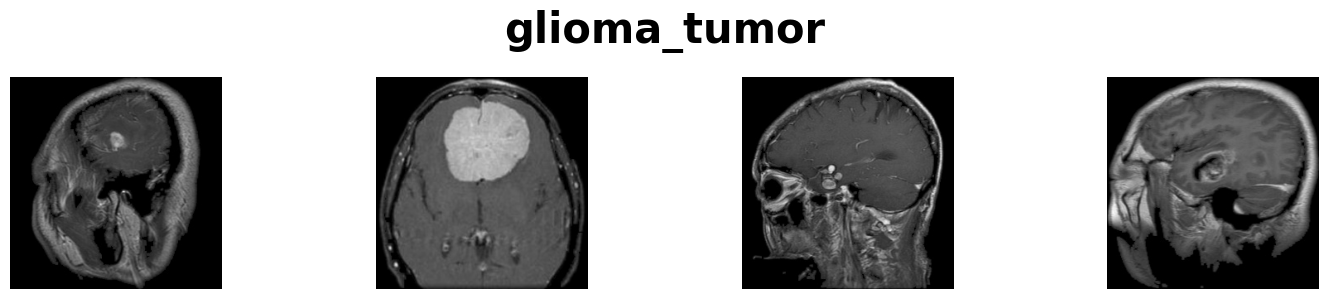

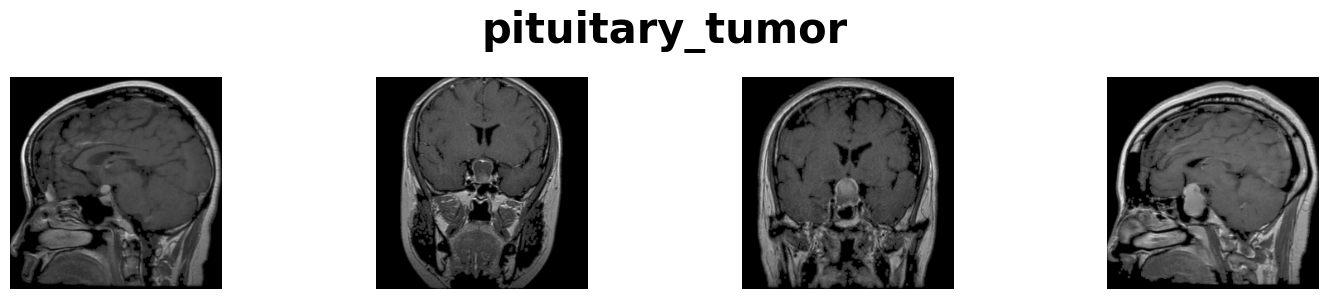

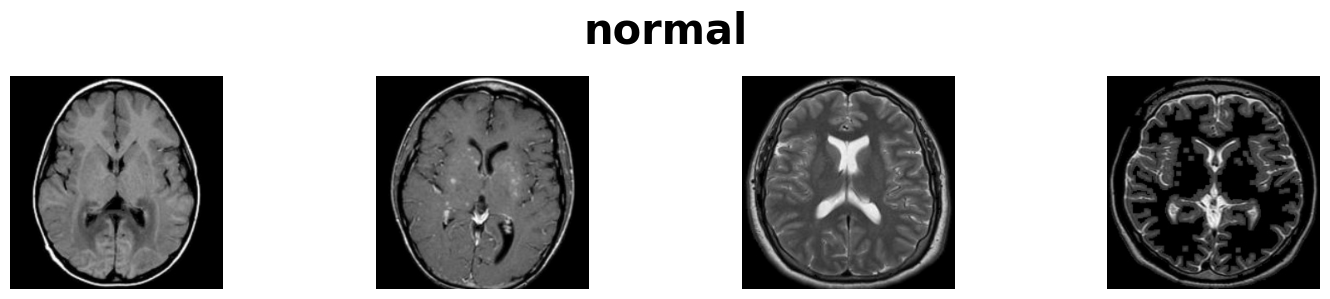

In [35]:
for class_name in classes :
    fig, ax = plt.subplots(1, 4, figsize=(15, 3))
    class_path = os.path.join(dir, class_name)
    files = os.listdir(class_path)
    random_images = random.choices(files, k=4)
    for i in range(4) :
        plt.suptitle(class_name, fontsize=30, fontweight='bold')
        img = os.path.join(class_path ,random_images[i])
        img = keras.utils.load_img(img)
        ax[i].imshow(img)
        ax[i].axis('off')
    plt.tight_layout()

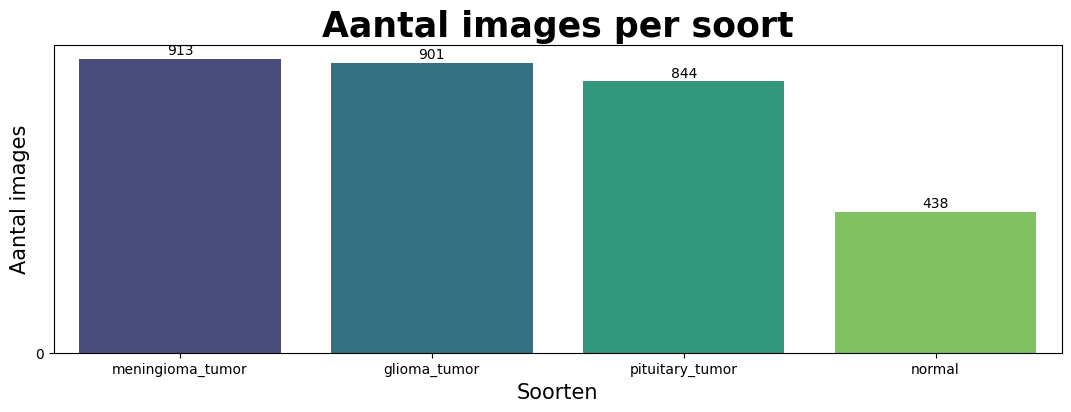

In [50]:
counts = []
for class_name in classes:
    class_path = os.path.join(dir, class_name)
    counts.append(len(os.listdir(class_path)))
plt.figure(figsize=(13, 4))
ax = sns.barplot(y=counts, x=classes, hue=classes, palette='viridis', dodge=False, legend=False)
ax.set_yticks(range(0, 4, 100))
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 5,
            '{}'.format(counts[i]),
            ha="center", va="bottom", fontsize=10)
plt.title('Aantal images per soort', fontsize=25, fontweight='bold')
plt.ylabel('Aantal images', fontsize=15)
plt.xlabel('Soorten', fontsize=15)
plt.show()

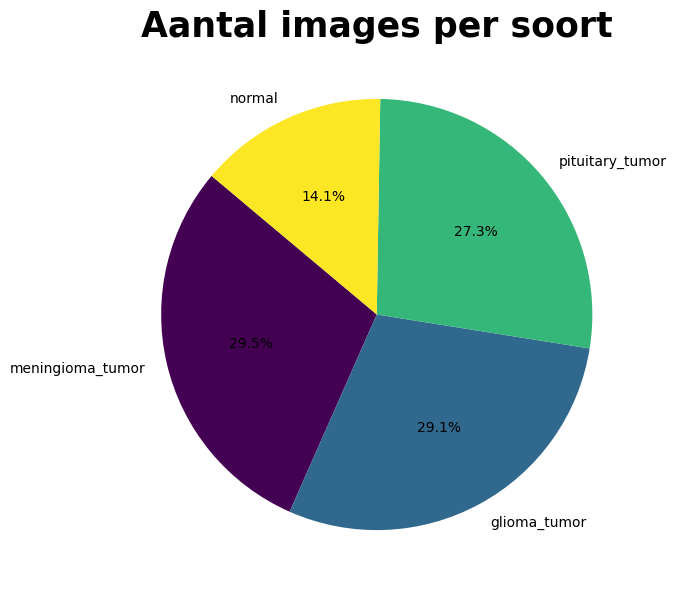

In [53]:
import os
import matplotlib.pyplot as plt

# Count is a list to store number of images for each class.
counts = []
for class_name in classes:
    class_path = os.path.join(dir, class_name)
    counts.append(len(os.listdir(class_path)))

# Define plot size
plt.figure(figsize=(10, 7))

# Create a pie chart with different colors
colors = plt.cm.viridis(np.linspace(0, 1, len(classes)))
plt.pie(counts, labels=classes, autopct='%1.1f%%', startangle=140, colors=colors)

# Set plot title
plt.title('Aantal images per soort', fontsize=25, fontweight='bold')

# Show plot
plt.show()

In [55]:
train_full = keras.utils.image_dataset_from_directory(
    directory=dir,        # Path of base directory
    labels='inferred',         # to generate labels from the directory structure
    label_mode='categorical',  # type of labels
    class_names=classes,       # list of class_names
    shuffle=True,              # To shuffle dataset
    seed=42,                   # Optional random seed for shuffling and transformations
    batch_size=32,             # Define batch size
    image_size=(224, 224)      # Size to resize images to after they are read from disk
 )

Found 3096 files belonging to 4 classes.


In [56]:
train_full = train_full.shuffle(1024).prefetch(tf.data.AUTOTUNE)

In [57]:
# Print Number of all batches in dataset
num_of_full_train_batches = len(list(train_full))
print(colored(f'Number of batches in train_full : {num_of_full_train_batches}', 'black', attrs=['bold']))

Number of batches in train_full : 97


In [58]:
# Define variable to store number of batches for train dataset
num_train_batches = int(num_of_full_train_batches * 0.80)
# Define variable to store number of batches for validation and test dataset
num_valid_test_batches = num_of_full_train_batches - num_train_batches


# Print the TARGET : number of batches for train, validation and test dataset to each
print(colored(' Target : ', 'green', attrs=['bold']))
print('-'*35)
print(colored(f'Number of  Train  batches : {num_train_batches}', 'blue', attrs=['bold']))
print(colored(f'Number of Validation batches : {num_valid_test_batches//2}', 'blue', attrs=['bold']))
print(colored(f'Number of Test batches : {num_valid_test_batches//2}', 'blue', attrs=['bold']))

 Target : 
-----------------------------------
Number of  Train  batches : 77
Number of Validation batches : 10
Number of Test batches : 10


In [59]:
# Shuffle dataset
train_full = train_full.shuffle(buffer_size=3)

# Apply above settings to main dataset to split to train, validation and test dataset
train_ds = train_full.take(num_train_batches)
remain_ds = train_full.skip(num_train_batches)
valid_ds = remain_ds.take(num_valid_test_batches//2) 
test_ds = remain_ds.skip(num_valid_test_batches//2)

In [60]:
# Print number of batches in train, validation and test dataset after split them
print(colored(f'Number of train batches : {len(list(train_ds))}', 'green', attrs=['bold']))
print(colored(f'Number of valid batches : {len(list(valid_ds))}', 'green', attrs=['bold']))
print(colored(f'Number of test  batches : {len(list(test_ds))}', 'green', attrs=['bold']))

Number of train batches : 77
Number of valid batches : 10
Number of test  batches : 10
